In [1]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

corpus = MyCorpus('Full_Text') # create a dictionary

In [2]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np

os.environ['DTM_PATH'] = r"dtm-win64.exe"

if not os.environ.get('DTM_PATH', None):
    raise ValueError("SKIP: You need to set the DTM path")

In [3]:
import glob

time_seq = []

for year in range(2015, 2020):
    docs_num = len(glob.glob("Full_Text\\" + str(year) + "*"))
    print(f"Year {year} has {docs_num} documents")
    time_seq.append(docs_num)

Year 2015 has 124 documents
Year 2016 has 134 documents
Year 2017 has 190 documents
Year 2018 has 219 documents
Year 2019 has 183 documents


In [4]:
time_seq

[124, 134, 190, 219, 183]

In [5]:
dtm_path = os.environ['DTM_PATH']

In [6]:
num_topics = 2

model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)

In [7]:
topic_list = []

for id in range(num_topics):
    topic = [model.show_topic(topicid=id, time=time, topn=10) for time in range(5)]
    topic_list.append(topic)

In [8]:
topic_list[0]

[[(0.009765202955551324, 'income'),
  (0.009653686296354042, 'net'),
  (0.008913338225684637, 'financial'),
  (0.008323073070300143, 'cash'),
  (0.008300250452600466, 'plan'),
  (0.008275976044318137, 'sales'),
  (0.007226637937281908, 'fiscal'),
  (0.006412461133381971, 'operating'),
  (0.006288583273086304, 'year'),
  (0.00599507282560123, 'operations')],
 [(0.009307040005317761, 'net'),
  (0.009185227337308723, 'income'),
  (0.008705309802891492, 'financial'),
  (0.008563597077146115, 'plan'),
  (0.008282163944342445, 'cash'),
  (0.008200730839045706, 'sales'),
  (0.007229817650810396, 'fiscal'),
  (0.006200459792076076, 'operating'),
  (0.006145570748654707, 'year'),
  (0.005558193634908631, 'us')],
 [(0.008857171599080957, 'net'),
  (0.008791673313462693, 'plan'),
  (0.008369189790880043, 'income'),
  (0.008353441325962482, 'financial'),
  (0.008176812086784913, 'cash'),
  (0.008053067603875898, 'sales'),
  (0.007406838774081161, 'fiscal'),
  (0.006043481899921243, 'operating'),
 

In [9]:
topic_list[1]

[[(0.01680830354631561, 'shall'),
  (0.016206193551108364, 'notes'),
  (0.012838923755677578, 'debt'),
  (0.011350626268277065, 'interest'),
  (0.011155105926579615, 'trust'),
  (0.011086175819636595, 'walton'),
  (0.008688817018443797, 'series'),
  (0.00766544236776009, 'prospectus'),
  (0.007451657530451287, 'agreement'),
  (0.005956749649316513, 'principal')],
 [(0.017604762226521967, 'notes'),
  (0.01642985732663164, 'shall'),
  (0.013629480411266355, 'debt'),
  (0.011792768484011023, 'interest'),
  (0.009099109377522927, 'trust'),
  (0.009013120445367343, 'series'),
  (0.00815456011969235, 'prospectus'),
  (0.007765445307671664, 'walton'),
  (0.0073627356768715055, 'agreement'),
  (0.006234335059150121, 'indenture')],
 [(0.02018339529342091, 'notes'),
  (0.015175484834774189, 'debt'),
  (0.01261965606434567, 'interest'),
  (0.012025620341318084, 'shall'),
  (0.009625942233778622, 'series'),
  (0.009115523722250033, 'prospectus'),
  (0.007198309394593994, 'agreement'),
  (0.0068428

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

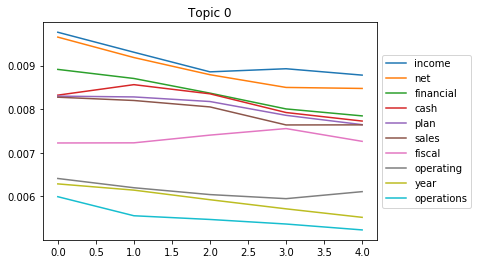

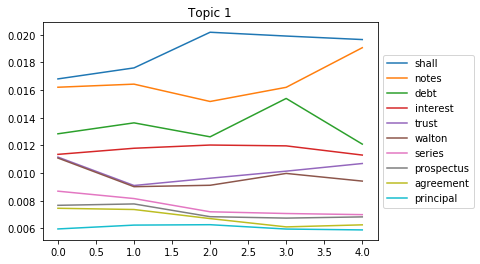

In [11]:
x = range(5)

for index, topic in enumerate(topic_list):
    plt.title("Topic " + str(index))

    for word in range(10):
        prob = [sub[word] for sub in topic]
        values = [probability[0] for probability in prob]
        plt.plot(x, values, label = prob[0][1])
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()